## Modulos

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage import data, io, color, img_as_float
import math

## Carga imagen y visualización

(4000, 6000, 3)


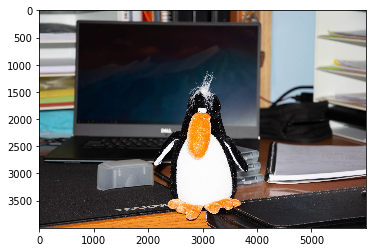

In [2]:
# Imgfile='./IMAGES/304baf26742db277bf48c524b3fd1f29.jpg'  #Posible
# Imgfile='./IMAGES/Before-After.jpg'                      #meh
# Imgfile='./IMAGES/download.jpg'                          # muy baja calidad
# Imgfile='./IMAGES/flash-blown-out.jpg'                   # bastante quemada
# Imgfile='./IMAGES/flash-blow-out.jpg'                    #Irrecuperable
# Imgfile='./IMAGES/lucio-and-i-bad-lighting.jpg'          #Amarillento
Imgfile='./IMAGES/Propias/jpg/ARA_9558.jpg'
# Imgfile='./IMAGES/Propias/jpg/ARA_9557.jpg'
img=cv2.imread(Imgfile,cv2.IMREAD_COLOR)
# img=cv2.resize(img,(600,400))
RGBimg=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
RGBimg=RGBimg/255
plt.imshow(RGBimg)
print(RGBimg.shape)

## Visualización zonas en el X%

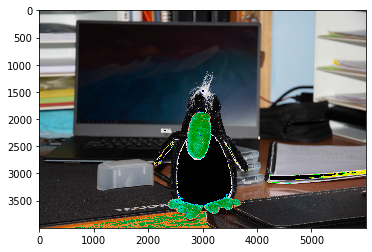

In [12]:
img=cv2.imread(Imgfile,cv2.IMREAD_COLOR)
# img=cv2.resize(img,(600,400))
RGBimg=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
RGBimg=RGBimg/255
plt.imshow(np.where(RGBimg>0.94, 0, RGBimg))

### Trasformacion formada por dos rectas (sin salto entre ellas)

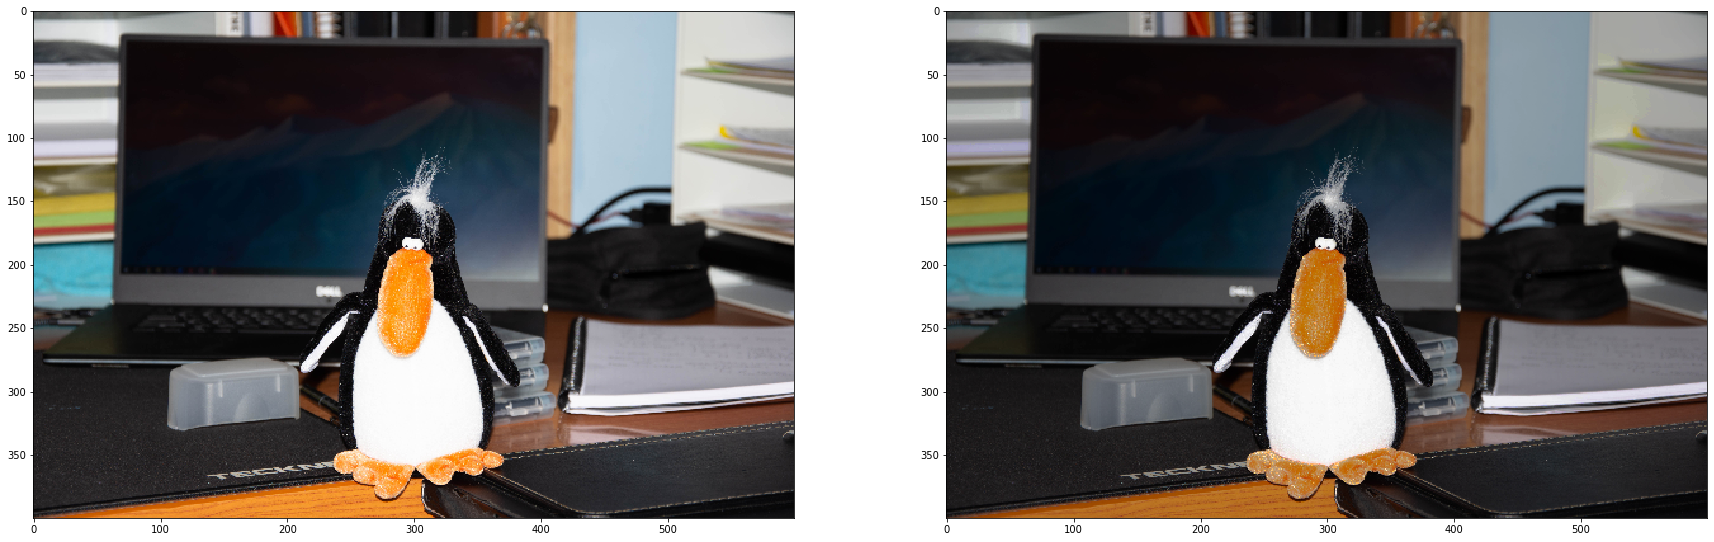

In [14]:
# img=cv2.imread('./IMAGES/flash-blown-out.jpg',cv2.IMREAD_COLOR)
img=cv2.imread(Imgfile,cv2.IMREAD_COLOR)
img=cv2.resize(img,(600,400))
RGBimg=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
RGBimg=RGBimg/255
def doble_recta(img,xc,yc):
    max=np.max(img)
    img=img*1/max
    nx,ny,nz=img.shape
    out=np.copy(img)
    for x in range(nx):
        for y in range(ny):
            
            if np.mean(img[x,y,:])<(1-xc):
                m=1-(yc/(1-xc))
                out[x,y,:]=img[x,y,:]*m
            else:
                m=yc/xc+1
                n=1-m
                out[x,y,:]=img[x,y,:]*m+n
    return out
fig, axs = plt.subplots(1,2,figsize=(30,20))
axs[1].imshow(doble_recta(RGBimg,0.15,0.2))
axs[0].imshow(RGBimg)

### Trasformacion exponencial vista en clase

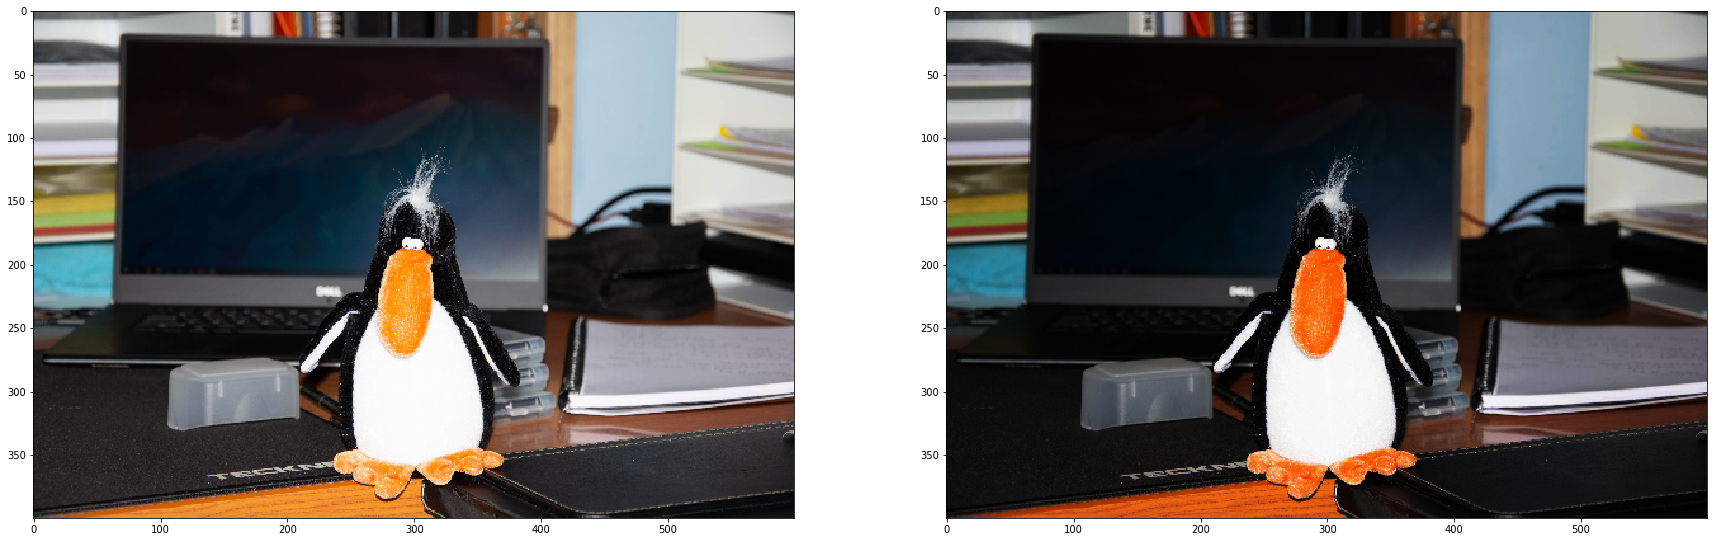

In [5]:
img=cv2.imread(Imgfile,cv2.IMREAD_COLOR)
img=cv2.resize(img,(600,400))
RGBimg=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
RGBimg=RGBimg/255
def exponencial(img,alpha):
    nx,ny,nz=img.shape
    out=np.copy(img)
    c=1/((1+alpha)**np.max(img)-1)
    for x in range(nx):
        for y in range(ny):
            for z in range(nz):
                
                out[x,y,z]=c*((1+alpha)**img[x,y,z]-1)
    return out

fig, axs = plt.subplots(1,2,figsize=(30,20))
axs[1].imshow(exponencial(RGBimg,5))
axs[0].imshow(RGBimg)

### Trasformacion logaritmica vista en clase

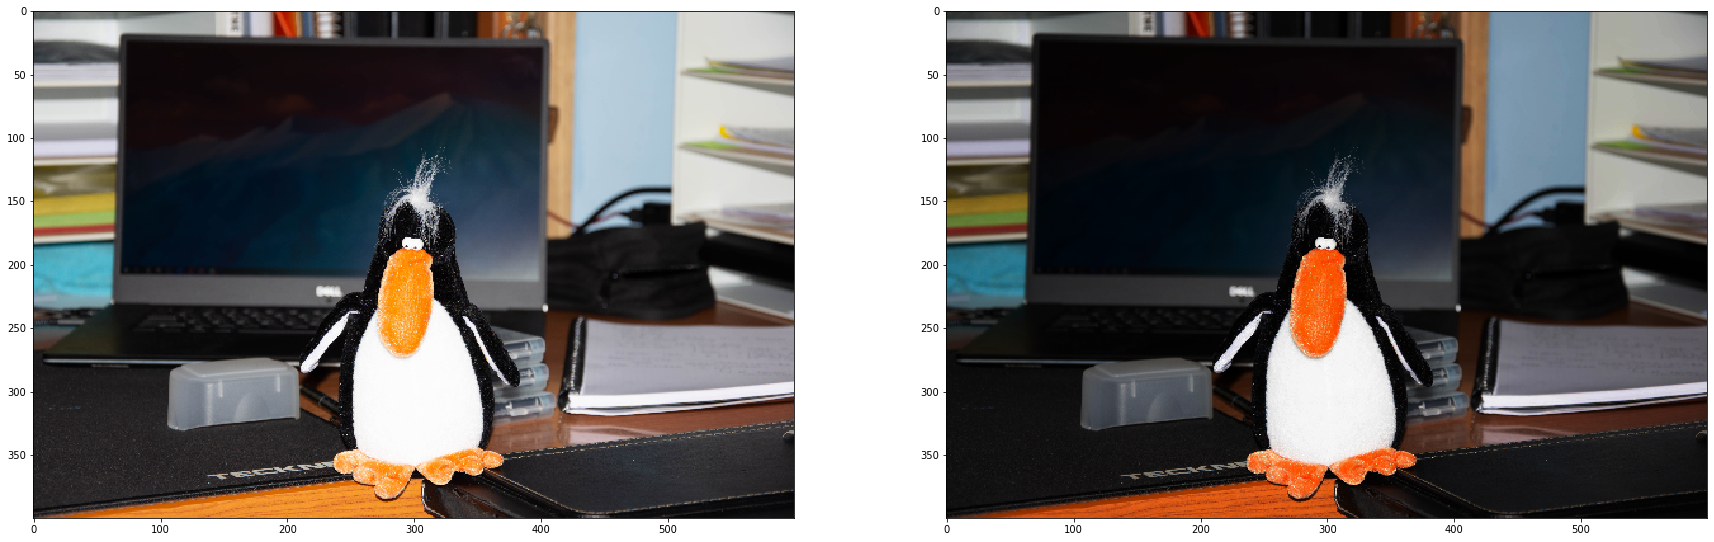

In [8]:
img=cv2.imread(Imgfile,cv2.IMREAD_COLOR)
img=cv2.resize(img,(600,400))
RGBimg=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
RGBimg=RGBimg/255
def logaritmica(img,alpha):
    nx,ny,nz=img.shape
    out=np.copy(img)
    c=1/np.log(1+(math.exp(alpha)-1)*np.max(img))
    for x in range(nx):
        for y in range(ny):
            for z in range(nz):
                
                out[x,y,z]=c*np.log(1+(math.exp(alpha)-1)*img[x,y,z])
    return out

fig, axs = plt.subplots(1,2,figsize=(30,20))
axs[1].imshow(logaritmica(RGBimg,-2))
axs[0].imshow(RGBimg)